# Lennard-Jones System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math
import seaborn as sns
from scipy.optimize import curve_fit

## First Code

In [2]:
df1=pd.read_excel('First.xlsx')

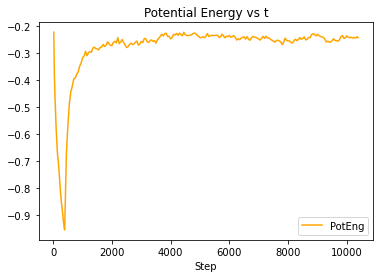

In [3]:
df1.iloc[2:,:].plot(kind='line',x='Step',y='PotEng',color='orange')
plt.title('Potential Energy vs t')
plt.show()

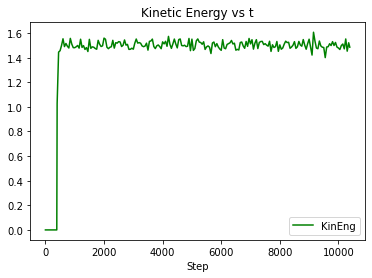

In [4]:
df1.plot(kind='line',x='Step',y='KinEng',color='green')
plt.title('Kinetic Energy vs t')
plt.show()

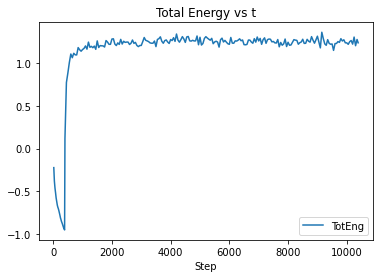

In [5]:
df1.iloc[2:,:].plot(kind='line',x='Step',y='TotEng')
plt.title('Total Energy vs t')
plt.show()

## Improved LJ System

### Energy Fluctuations

In [6]:
df=pd.read_excel('Improved_Log.xlsx')
df.head()

,Step,Temp,E_pair,E_mol,TotEng,Press
0,0,1.000000,-0.139077,0,1.359617,0.015860
1,1000,0.983771,-0.118385,0,1.355986,0.018096
2,2000,1.024766,-0.102330,0,1.433480,0.019916
3,3000,0.981270,-0.130407,0,1.340217,0.018381
4,4000,1.009058,-0.162055,0,1.350215,0.017597


Text(0.5, 1.0, 'Total Energy vs t')

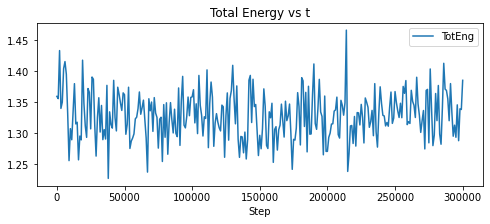

In [7]:
df.plot(kind='line', x='Step', y='TotEng', figsize=(8,3))
plt.title('Total Energy vs t')

Text(0.5, 1.0, 'Total Energy vs t')

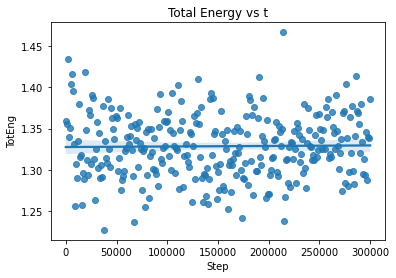

In [8]:
sns.regplot(x='Step',y='TotEng',data=df)
plt.title('Total Energy vs t')

Text(0.5, 1.0, 'Total Energy vs t')

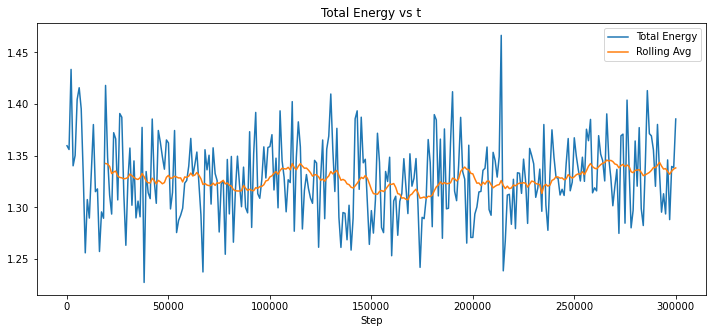

In [9]:
df_E_rolling_1=df[['Step','TotEng']]
df_E_rolling_1.set_index('Step',inplace=True)
df_E_rolling_1=df_E_rolling_1.rolling(20).mean()
df_E_rolling_1.reset_index(inplace=True)
df_E_rolling_1.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(12,5))
df.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Total Energy')
df_E_rolling_1.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Rolling Avg')
plt.legend()
plt.title('Total Energy vs t')

In [10]:
#Data for 600000 Timesteps
df_added=pd.read_excel('Added_Log.xlsx')
df_added.head()

,Step,Temp,E_pair,E_mol,TotEng,Press
0,0,1.000000,-0.139077,0,1.359617,0.015860
1,1000,0.983771,-0.118385,0,1.355986,0.018096
2,2000,1.024766,-0.102330,0,1.433480,0.019916
3,3000,0.981270,-0.130407,0,1.340217,0.018381
4,4000,1.009058,-0.162055,0,1.350215,0.017597


Text(0.5, 1.0, 'Total Energy vs t')

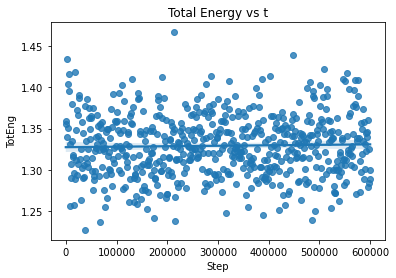

In [11]:
sns.regplot(x='Step',y='TotEng',data=df_added)
plt.title('Total Energy vs t')

Text(0.5, 1.0, 'Total Energy vs t')

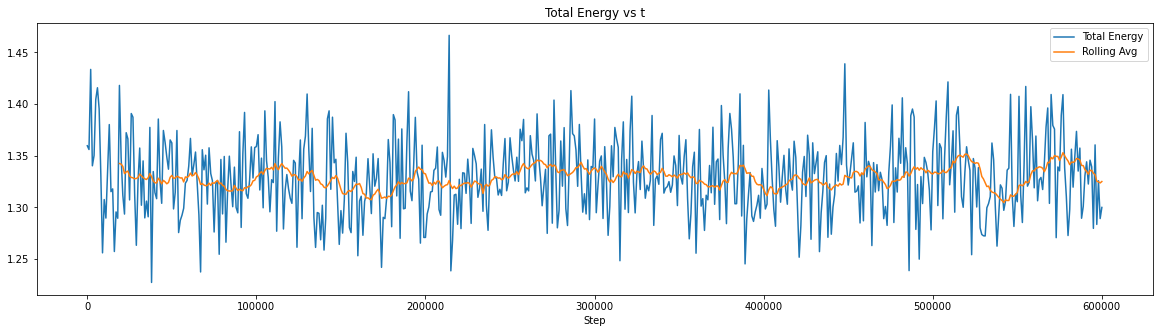

In [12]:
df_E_rolling_2=df_added[['Step','TotEng']]
df_E_rolling_2.set_index('Step',inplace=True)
df_E_rolling_2=df_E_rolling_2.rolling(20).mean()
df_E_rolling_2.reset_index(inplace=True)
df_E_rolling_2.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(20,5))
df_added.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Total Energy')
df_E_rolling_2.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Rolling Avg')
plt.legend()
plt.title('Total Energy vs t')

In [13]:
# 2nd Addition
df_added_2=pd.read_excel('Added_Log_2.xlsx')
df_added_2.head()

,Step,Temp,E_pair,E_mol,TotEng,Press
0,0,1.000000,-0.139077,0,1.359617,0.015860
1,1000,0.983771,-0.118385,0,1.355986,0.018096
2,2000,1.024766,-0.102330,0,1.433480,0.019916
3,3000,0.981270,-0.130407,0,1.340217,0.018381
4,4000,1.009058,-0.162055,0,1.350215,0.017597


Text(0.5, 1.0, 'Total Energy vs t (with 5M TimeSteps)')

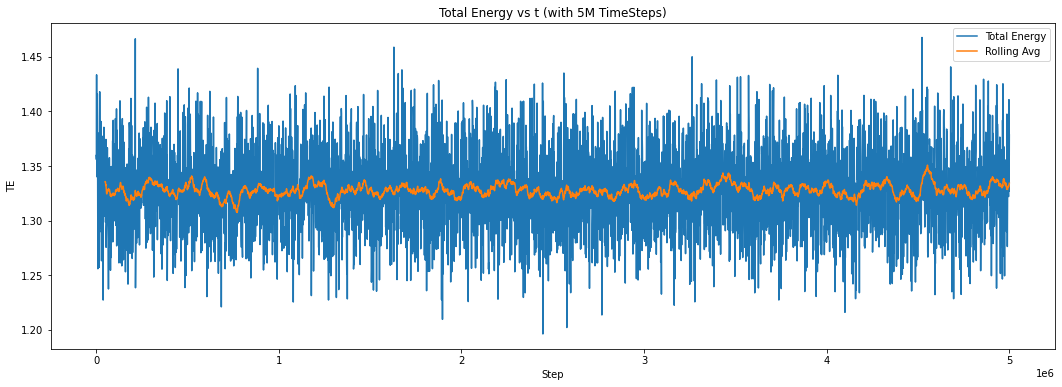

In [14]:
df_added_5M=pd.read_excel('Added_5M.xlsx')
df_added_5M.head()

df_E_rolling_5M=df_added_5M[['Step','TotEng']]
df_E_rolling_5M.set_index('Step',inplace=True)
df_E_rolling_5M=df_E_rolling_5M.rolling(50).mean()
df_E_rolling_5M.reset_index(inplace=True)
df_E_rolling_5M.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(18,6))
df_added_5M.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Total Energy')
df_E_rolling_5M.plot(kind='line', x='Step', y='TotEng', ax=ax,label='Rolling Avg')
plt.legend()
plt.ylabel('TE')
plt.title('Total Energy vs t (with 5M TimeSteps)')

### Energy Histograms

Text(0.5, 1.0, 'Energy_Counts(for 300K TimeSteps)')

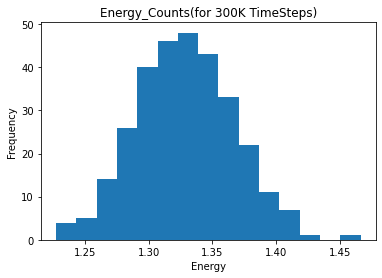

In [15]:
df['TotEng'].plot(kind='hist',bins=15)
plt.xlabel('Energy')
plt.title('Energy_Counts(for 300K TimeSteps)')

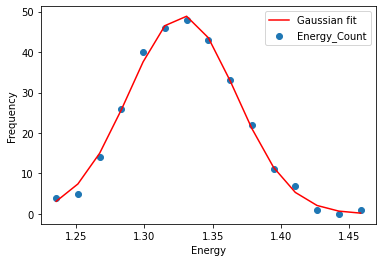

Parameters for Gaussian fit: [4.90121998e+01 1.32774181e+00 3.09437364e-03]


In [16]:
E_counts, bins= np.histogram(df['TotEng'], bins=15)
x_data=[]
i=0
while i<len(bins)-1:
    x_data.append((bins[i]+bins[i+1])/2)
    i+=1
x_data=np.array(x_data)
E_counts=np.array(E_counts)
def Gaussian(x,a,b,c):
    return a*np.exp(-((x-b)**2)/c)
popt, pcov = curve_fit(f=Gaussian, xdata=x_data, ydata=E_counts, p0=[1, np.mean(bins), np.std(bins)])
plt.scatter(x=x_data, y=E_counts, label='Energy_Count')
plt.plot(x_data, Gaussian(x_data, *popt), color='red', label='Gaussian fit')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print('Parameters for Gaussian fit:',popt)

Text(0.5, 1.0, 'Energy_Counts(for 5M TimeSteps)')

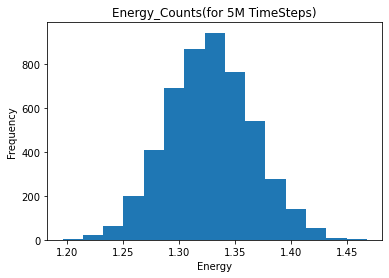

In [17]:
df_added_5M['TotEng'].plot(kind='hist',bins=15)
plt.xlabel('Energy')
plt.title('Energy_Counts(for 5M TimeSteps)')

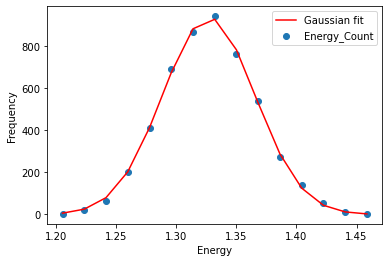

Parameters for Gaussian fit (a, sigma, delta): [9.37103151e+02 1.32703581e+00 2.97408137e-03]


In [18]:
E_counts, bins= np.histogram(df_added_5M['TotEng'], bins=15)
x_data=[]
i=0
while i<len(bins)-1:
    x_data.append((bins[i]+bins[i+1])/2)
    i+=1
x_data=np.array(x_data)
E_counts=np.array(E_counts)
def Gaussian(x,a,b,c):
    return a*np.exp(-((x-b)**2)/c)
popt, pcov = curve_fit(f=Gaussian, xdata=x_data, ydata=E_counts, p0=[500, np.mean(bins), np.std(bins)])
plt.scatter(x=x_data, y=E_counts, label='Energy_Count')
plt.plot(x_data, Gaussian(x_data, *popt), color='red', label='Gaussian fit')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print('Parameters for Gaussian fit (a, sigma, delta):',popt)

<br>
For a cononical ensemble, $\Delta E=\sqrt{k_B T^2 C_V}$. We kmow that $C_V$ and E are extensive properties $\implies C_V, E \propto N$. Therefore, $\frac{\Delta E}{E} \rightarrow 0$.

In [19]:
delta_E=df['TotEng'].std()
df['delta_E/E']=delta_E/df['TotEng']
mean_delta_EbyE=df['delta_E/E'].mean()
display(Math(rf'Mean $\delta E/E = {mean_delta_EbyE:.5e}$'))

<IPython.core.display.Math object>

$\therefore < \frac{\delta E}{E} > \approx 0.028877$

Text(0.5, 0, '$\\frac{\\delta E}{E}$')

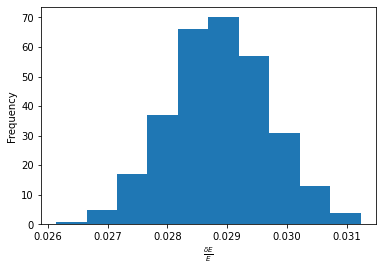

In [20]:
df['delta_E/E'].plot(kind='hist')
plt.xlabel(r'$\frac{\delta E}{E}$')

### Temperature Fluctuations

For 300,000 TimeSteps

Text(0.5, 1.0, 'Temperature_Counts (300K TimeSteps)')

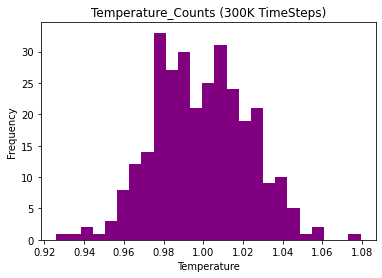

In [21]:
df['Temp'].plot(kind='hist',color='purple',bins=25)
plt.xlabel('Temperature')
plt.title('Temperature_Counts (300K TimeSteps)')

Text(0.5, 1.0, 'Temperature vs t')

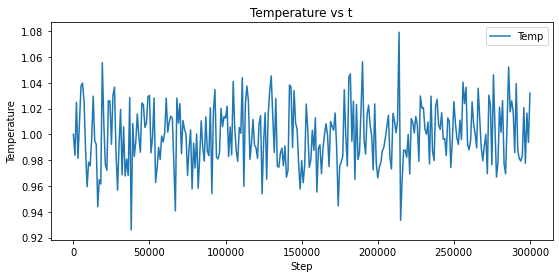

In [22]:
df.plot(kind='line',x='Step',y='Temp',figsize=(9,4))
plt.ylabel('Temperature')
plt.title('Temperature vs t')

<AxesSubplot:xlabel='Step', ylabel='Temp'>

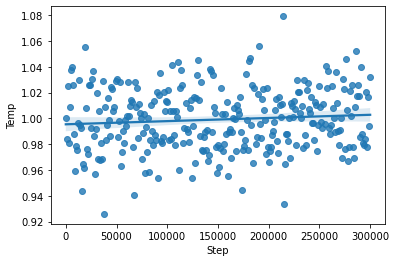

In [23]:
import seaborn as sns
sns.regplot(x='Step',y='Temp',data=df)

Text(0.5, 1.0, 'Temerature vs t (300K TimeSteps)')

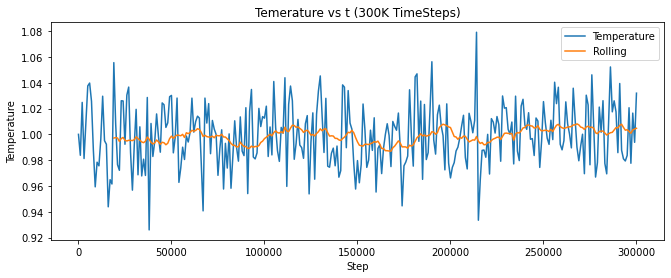

In [24]:
df_T_rolling=df[['Step','Temp']]
df_T_rolling.set_index('Step',inplace=True)
df_T_rolling=df_T_rolling.rolling(20).mean()
df_T_rolling.reset_index(inplace=True)
df_T_rolling.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(11,4))
df.plot(kind='line', x='Step', y='Temp', ax=ax,label='Temperature')
df_T_rolling.plot(kind='line', x='Step', y='Temp', ax=ax,label='Rolling')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temerature vs t (300K TimeSteps)')

For 600,000 TimeSteps

Text(0.5, 1.0, 'Temerature_Counts (600K TimeSteps)')

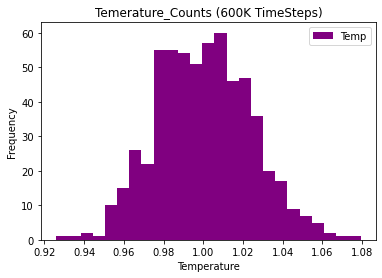

In [25]:
df_added['Temp'].plot(kind='hist',color='purple',bins=25)
plt.xlabel('Temperature')
plt.legend()
plt.title('Temerature_Counts (600K TimeSteps)')

Text(0.5, 1.0, 'Temerature vs t (600K TimeSteps)')

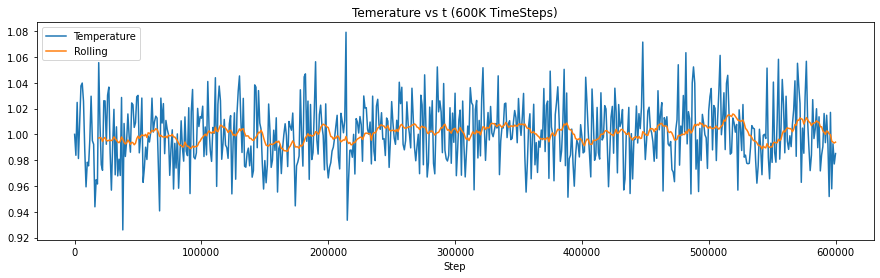

In [26]:
df_T_rolling_2=df_added[['Step','Temp']]
df_T_rolling_2.set_index('Step',inplace=True)
df_T_rolling_2=df_T_rolling_2.rolling(20).mean()
df_T_rolling_2.reset_index(inplace=True)
df_T_rolling_2.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(15,4))
df_added.plot(kind='line', x='Step', y='Temp', ax=ax,label='Temperature')
df_T_rolling_2.plot(kind='line', x='Step', y='Temp', ax=ax,label='Rolling')
plt.legend()
plt.title('Temerature vs t (600K TimeSteps)')

In [27]:
print('Avg Temp in 1st half=',df_added['Temp'][:300].mean())
print('Avg Temp in 2nd half=',df_added['Temp'][301:].mean())
print('Total Avg=',df_added['Temp'].mean())

Avg Temp in 1st half= 0.9989677456333332
Avg Temp in 2nd half= 1.0019158809000004
Total Avg= 1.0004941746422624


For 900,000 TimeSteps

Text(0.5, 1.0, 'Temerature vs t (900K TimeSteps)')

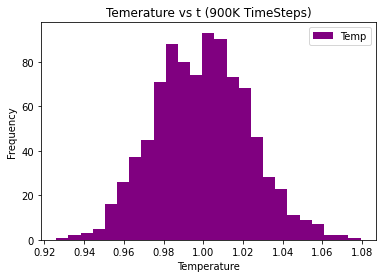

In [28]:
df_added_2['Temp'].plot(kind='hist',color='purple',bins=25)
plt.xlabel('Temperature')
plt.legend()
plt.title('Temerature vs t (900K TimeSteps)')

Text(0.5, 1.0, 'Temerature vs t (900K TimeSteps)')

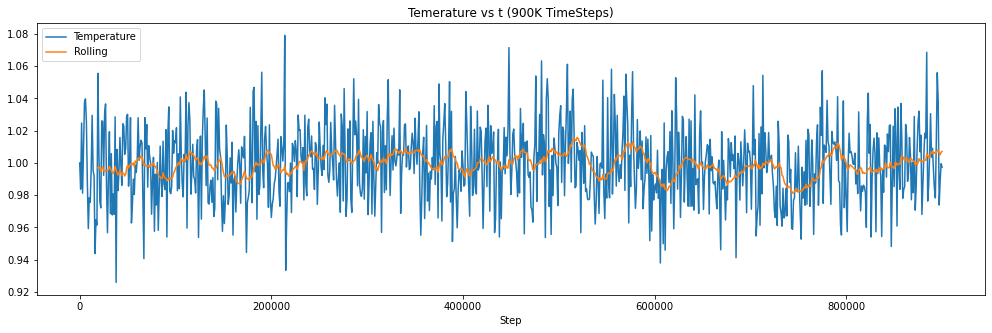

In [29]:
df_T_rolling_3=df_added_2[['Step','Temp']]
df_T_rolling_3.set_index('Step',inplace=True)
df_T_rolling_3=df_T_rolling_3.rolling(20).mean()
df_T_rolling_3.reset_index(inplace=True)
df_T_rolling_3.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(17,5))
df_added_2.plot(kind='line', x='Step', y='Temp', ax=ax,label='Temperature')
df_T_rolling_3.plot(kind='line', x='Step', y='Temp', ax=ax,label='Rolling')
plt.legend()
plt.title('Temerature vs t (900K TimeSteps)')

In [30]:
print('Avg Temp in 1st half=',df_added_2['Temp'][:300].mean())
print('Avg Temp in 2nd half=',df_added_2['Temp'][301:601].mean())
print('Avg Temp in 3rd half=',df_added_2['Temp'][601:].mean())
print('Total Avg=',df_added_2['Temp'].mean())

Avg Temp in 1st half= 0.9989677456333332
Avg Temp in 2nd half= 1.0019158809000004
Avg Temp in 3rd half= 0.9968636546000007
Total Avg= 0.9992853444395113


5M TimeSteps

Text(0.5, 1.0, 'Temerature vs t (900K TimeSteps)')

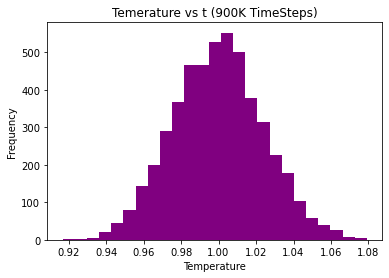

In [31]:
df_added_5M['Temp'].plot(kind='hist',color='purple',bins=25)
plt.xlabel('Temperature')
plt.title('Temerature vs t (900K TimeSteps)')

Text(0.5, 1.0, 'Temerature vs t (900K TimeSteps)')

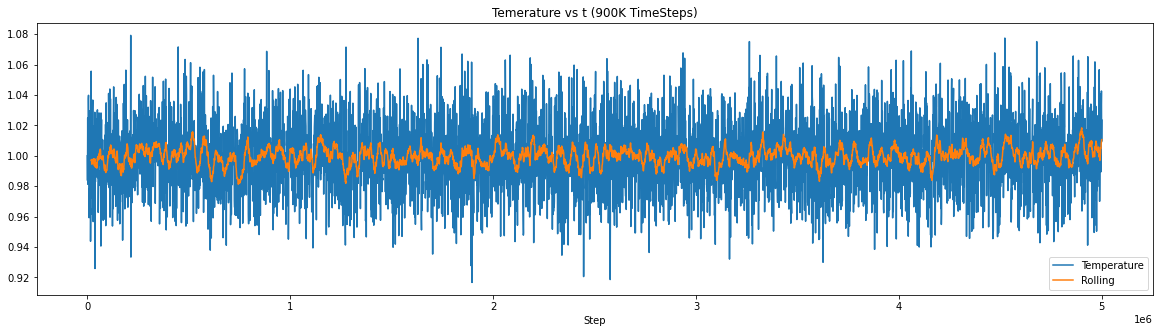

In [32]:
df_T_rolling_5M=df_added_5M[['Step','Temp']]
df_T_rolling_5M.set_index('Step',inplace=True)
df_T_rolling_5M=df_T_rolling_5M.rolling(20).mean()
df_T_rolling_5M.reset_index(inplace=True)
df_T_rolling_5M.dropna(inplace=True)

fig, ax=plt.subplots(figsize=(20,5))
df_added_5M.plot(kind='line', x='Step', y='Temp', ax=ax,label='Temperature')
df_T_rolling_5M.plot(kind='line', x='Step', y='Temp', ax=ax,label='Rolling')
plt.legend()
plt.title('Temerature vs t (900K TimeSteps)')

In [33]:
print('Total Avg=',df_added_5M['Temp'].mean())

Total Avg= 0.9997330332433487


### Potential and Kinetic Energy

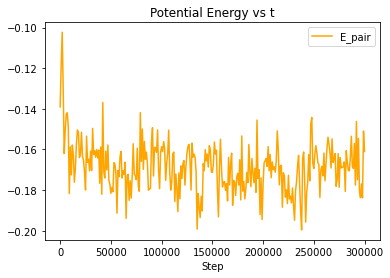

In [34]:
df.plot(kind='line',x='Step',y='E_pair',color='orange')
plt.title('Potential Energy vs t')
plt.show()

Text(0.5, 1.0, 'Potential Energy vs t')

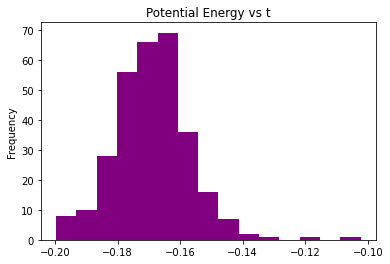

In [35]:
df['E_pair'].plot(kind='hist',bins=15,color='purple')
plt.title('Potential Energy vs t')

Text(0.5, 0, 'PE')

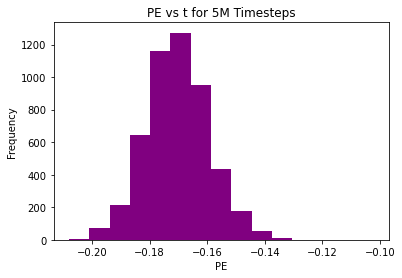

In [36]:
df_added_5M['E_pair'].plot(kind='hist',bins=15,color='purple')
plt.title('PE vs t for 5M Timesteps')
plt.xlabel('PE')

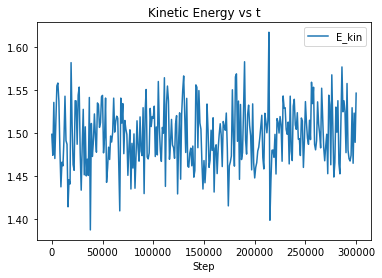

In [37]:
df['E_kin']=df['TotEng']-df['E_pair']
df.plot(kind='line',x='Step',y='E_kin')
plt.title('Kinetic Energy vs t')
plt.show()

Text(0.5, 1.0, 'Kinetic Energy vs t')

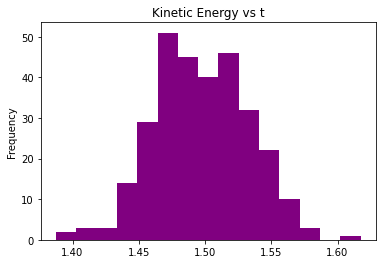

In [38]:
df['E_kin'].plot(kind='hist', bins=15, color='purple')
plt.title('Kinetic Energy vs t')

Text(0.5, 0, 'KE')

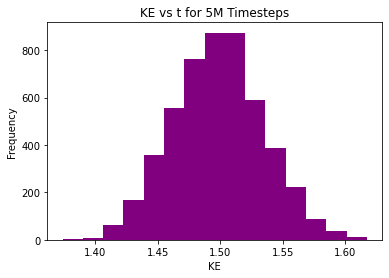

In [39]:
df_added_5M['E_kin']=df_added_5M['TotEng']-df_added_5M['E_pair']
df_added_5M['E_kin'].plot(kind='hist',bins=15,color='purple')
plt.title('KE vs t for 5M Timesteps')
plt.xlabel('KE')

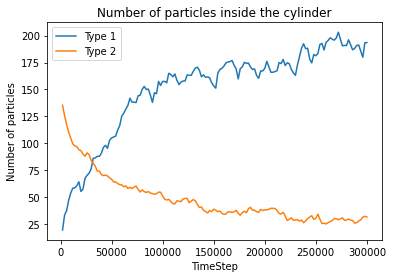

In [40]:
df_N1=pd.read_excel('N1.xlsx')
df_N2=pd.read_excel('N2.xlsx')

fig, ax=plt.subplots()

df_N1.plot(kind='line',x='TimeStep',y='N1',ax=ax,label='Type 1')
df_N2.plot(kind='line',x='TimeStep',y='N2',ax=ax,label='Type 2')

ax.set_title('Number of particles inside the cylinder')
ax.set_xlabel('TimeStep')
ax.set_ylabel('Number of particles')
ax.legend()
plt.show()

## Pair Correlation Function of Improved LJ

In [41]:
df11=pd.read_excel('PCF11.xlsx')

In [42]:
df11=df11.dropna()

In [53]:
df11.shape

(15000, 4)

In [54]:
df11.head()

,S.No,r,rdf,CN
0,1,0.0125,0.0,0.0
1,2,0.0375,0.0,0.0
2,3,0.0625,0.0,0.0
3,4,0.0875,0.0,0.0
4,5,0.1125,0.0,0.0


Text(0.5, 1.0, 'Type 1 - Type 1')

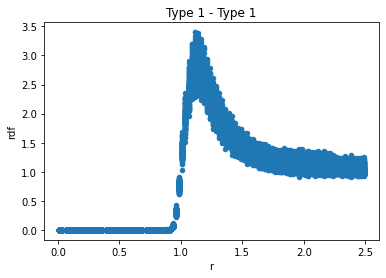

In [43]:
df11.plot(kind='scatter', x='r',y='rdf')
plt.title('Type 1 - Type 1')

In [ ]:
df_avg_11=df('')

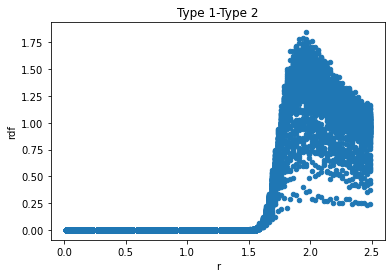

In [44]:
df12=pd.read_excel('PCF12.xlsx')
df12=df12.dropna()
df12.plot(kind='scatter',x='r',y='rdf')
plt.title('Type 1-Type 2')
plt.show()

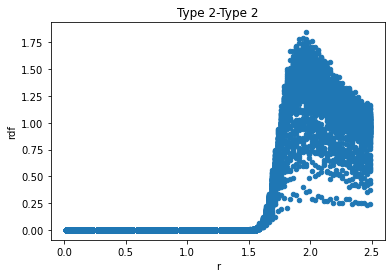

In [45]:
df12=pd.read_excel('PCF12.xlsx')
df12=df12.dropna()
df12.plot(kind='scatter',x='r',y='rdf')
plt.title('Type 2-Type 2')
plt.show()

## Final State

In [46]:
df_vel=pd.read_excel('Final_Velocity.xlsx')
df_vel['vtot']=((df_vel['vx'])**2+(df_vel['vy'])**2+(df_vel['vz'])**2)**0.5

Text(0.5, 1.0, 'Distribution of velocity')

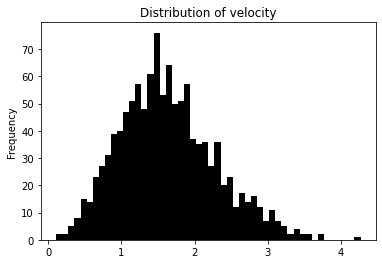

In [47]:
df_vel['vtot'].plot(kind='hist',bins=50,color='black')
plt.title('Distribution of velocity')

In [48]:
df_e=pd.read_excel('Final_Energy.xlsx')

<AxesSubplot:ylabel='Frequency'>

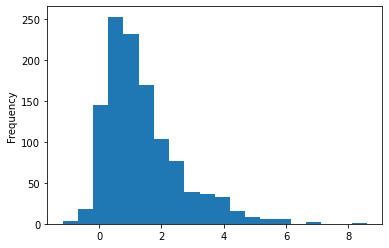

In [49]:
df_e['te_atom'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

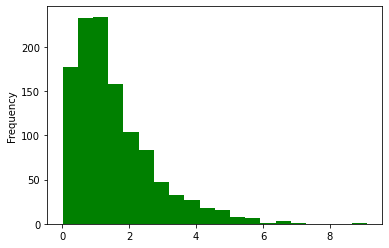

In [50]:
df_e['ke_atom'].plot(kind='hist',bins=20,color='green')

<AxesSubplot:ylabel='Frequency'>

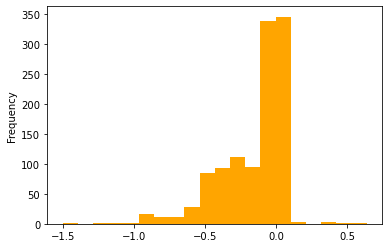

In [51]:
df_e['pe_atom'].plot(kind='hist',bins=20,color='orange')